<a href="https://colab.research.google.com/github/M-110/automate-the-boring-stuff/blob/main/12_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import IPython
IPython.display.HTML(url='https://inventwithpython.com/')

# Project Map it

In [ ]:
%%writefile map_it.py
#!/usr/bin/env python
"""Generate a link to google maps using the given address."""
import argparse
from urllib.parse import quote

def main():
  """Get args and print google maps url."""
  args = get_args()
  url = f'https://www.google.com/maps/place/{quote(args.address)}/'
  print(url)


def get_args():
  """Get arguments from command line."""
  parser = argparse.ArgumentParser(
      description='Generate a google maps url for the address'
  )
  parser.add_argument('address', help='Target address')
  return parser.parse_args()


if __name__ == '__main__':
  main()


Overwriting map_it.py


In [ ]:
!python map_it.py '1600 Pennsylvania Avenue NW, Washington DC'

https://www.google.com/maps/place/1600%20Pennsylvania%20Avenue%20NW%2C%20Washington%20DC/


# Project: Opening All Search Results

In [ ]:
import googlesearch

In [ ]:
next(googlesearch.search('python'))

'https://www.python.org/'

In [ ]:
%%writefile top_google.py
#!/usr/bin/env python
"""Print the top n results of a google query."""
import argparse

import googlesearch


def main():
  """Print top n results of google query."""
  args = get_args()
  for url in googlesearch.search(args.query,
                                 num=args.num,
                                 stop=args.num,
                                 pause=1):
    print(url)


def get_args():
  """Get arguments from command line."""
  parser = argparse.ArgumentParser(
      description="Print top n results of google query"
  )
  parser.add_argument('query', help='Text to search for')
  parser.add_argument('-n',
                      '--num',
                      type=int,
                      help='Number of resultts to display',
                      default=10)
  return parser.parse_args()


if __name__ == '__main__':
  main()


Overwriting top_google.py


In [ ]:
!chmod +x top_google.py

In [ ]:
!./top_google.py "python" -n 5

https://www.python.org/
https://en.wikipedia.org/wiki/Python_(programming_language)
https://commons.wikimedia.org/wiki/File:Python_logo_and_wordmark.svg
https://www.w3schools.com/python/
https://www.w3schools.com/python/python_intro.asp


In [ ]:
!./top_google.py "how to search google with python"

https://www.geeksforgeeks.org/performing-google-search-using-python-code/
https://stackoverflow.com/questions/38635419/searching-in-google-with-python
https://stackoverflow.com/questions/3898574/google-search-using-python-script
https://stackoverflow.com/questions/37083058/programmatically-searching-google-in-python-using-custom-search
https://stackoverflow.com/questions/38619478/google-search-web-scraping-with-python
https://stackoverflow.com/questions/60120792/performing-list-of-google-search-using-python-code
https://www.studytonight.com/post/how-to-perform-google-search-using-python
https://www.youtube.com/watch?v=dyUhGZ6iNTc
https://towardsdatascience.com/current-google-search-packages-using-python-3-7-a-simple-tutorial-3606e459e0d4
https://pypi.org/project/googlesearch-python/


# Project: Downloading all xkcd comics

In [ ]:
from pathlib import Path
import time

import requests
from bs4 import BeautifulSoup


def download_all_xkcd_comics(home_page, dest='.'):
  """Download all comics xkcd and save them to the destination."""
  dest = Path(dest)
  if not dest.is_dir():
    dest.mkdir()
  home = BeautifulSoup(requests.get(home_page).text)
  count = home.find('a', rel='prev')['href'].strip('/')
  for i in range(1, int(count) + 2):
    html = requests.get(f'{home_page}/{i}').text
    page = BeautifulSoup(html)
    download_comic_from_page(page, dest, i)
  print(f'Saved {int(count)+1} files to {str(dest)}')



def download_comic_from_page(page, dest, i, retry=True):
  """Download the comic image from the page to target directory."""
  try:
    img = page.find('div', id='comic').img['src']
    img_content = requests.get('http:' + img).content
    with open(dest / f"{i:04}_{img.split('/')[-1]}", 'wb') as img_file:
      img_file.write(img_content)
  except:
    if retry:
      time.sleep(1)
      print(f'Retrying downloading comic #{i}')
      download_comic_from_page(page, dest, i, retry=False)
    else:
      print(f'Failed to download comic #{i}')


In [ ]:
download_all_xkcd_comics('https://xkcd.com', 'my_comics')

Retrying downloading comic #404
Failed to download comic #404
Failed to download image from comic #404
Failed to download image from comic #404
Retrying downloading comic #1350
Failed to download comic #1350
Failed to download image from comic #1350
Failed to download image from comic #1350
Retrying downloading comic #1416
Failed to download comic #1416
Failed to download image from comic #1416
Failed to download image from comic #1416
Retrying downloading comic #1525
Failed to download comic #1525
Failed to download image from comic #1525
Failed to download image from comic #1525
Retrying downloading comic #1608
Failed to download comic #1608
Failed to download image from comic #1608
Failed to download image from comic #1608
Retrying downloading comic #1663
Failed to download comic #1663
Failed to download image from comic #1663
Failed to download image from comic #1663
Retrying downloading comic #2067
Failed to download comic #2067
Failed to download image from comic #2067
Failed to 

In [ ]:
!ls my_comics | head -n 20

0001_barrel_cropped_(1).jpg
0002_tree_cropped_(1).jpg
0003_island_color.jpg
0004_landscape_cropped_(1).jpg
0005_blownapart_color.jpg
0006_irony_color.jpg
0007_girl_sleeping_noline_(1).jpg
0008_red_spiders_small.jpg
0009_firefly.jpg
0010_pi.jpg
0011_barrel_mommies.jpg
0012_poisson.jpg
0013_canyon_small.jpg
0014_copyright.jpg
0015_just_alerting_you.jpg
0016_monty_python.jpg
0017_what_if.jpg
0018_snapple.jpg
0019_george_clinton.jpg
0020_ferret.jpg


# Selenium

In [ ]:
!apt update &> /dev/null
!apt install chromium-chromedriver &> /dev/null
!pip install selenium &> /dev/null

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
browser = webdriver.Chrome('chromedriver',options=options)

def _screen_shot(self):
    from tempfile import NamedTemporaryFile as TempFile
    tmp = TempFile(suffix='.png')
    self.save_screenshot(tmp.name)
    return tmp.read()

webdriver.Chrome._repr_png_ = _screen_shot

In [ ]:
browser.get('https://python.org')

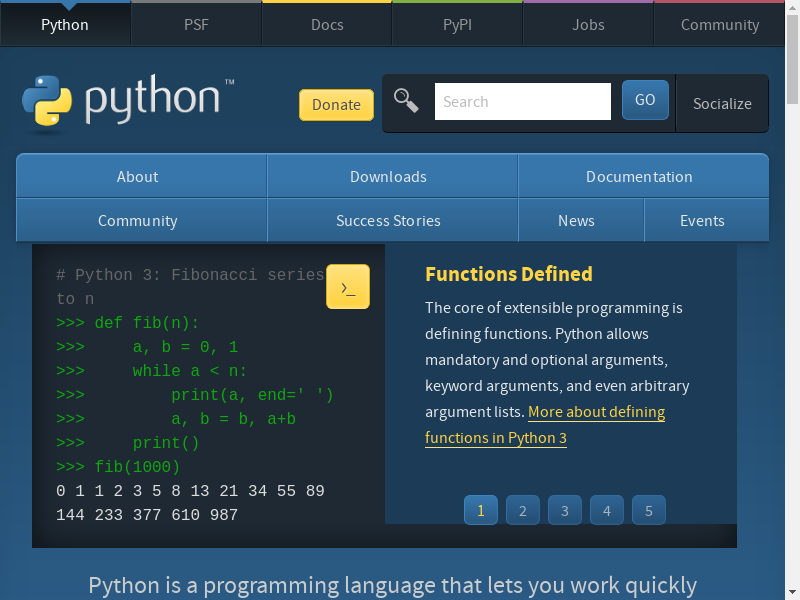

In [ ]:
browser

In [ ]:
search = browser.find_element('id', 'id-search-field')
search.click()
search.send_keys('webbrowser')
search.send_keys(Keys.ENTER)

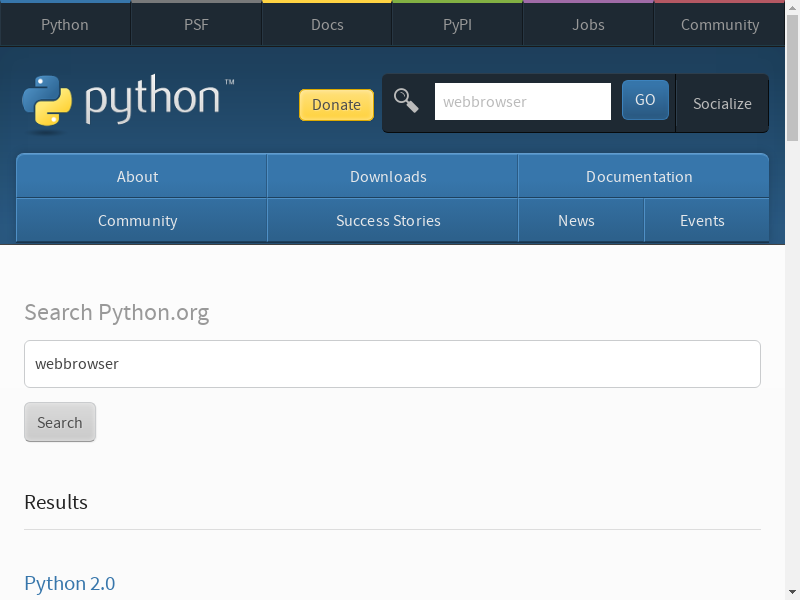

In [ ]:
browser

In [ ]:
browser.back()

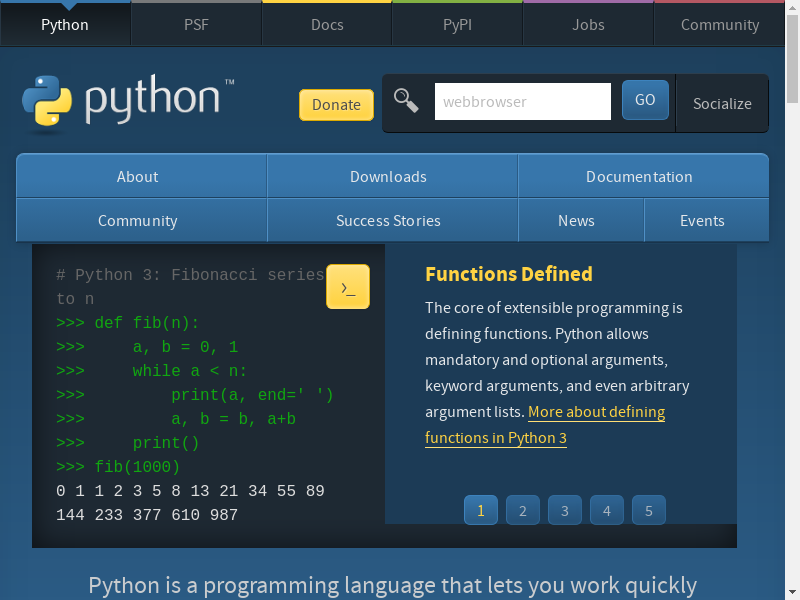

In [ ]:
browser

# Practice Projects

## Selenium Emailer

In [ ]:
from getpass import getpass
password = getpass()

··········


In [ ]:
browser.quit()
browser = webdriver.Chrome('chromedriver', options=options)

In [ ]:
browser.get('https://mail.onmail.com/login')

In [ ]:
browser.find_element('name', 'email').send_keys('selenium@onmail.com')

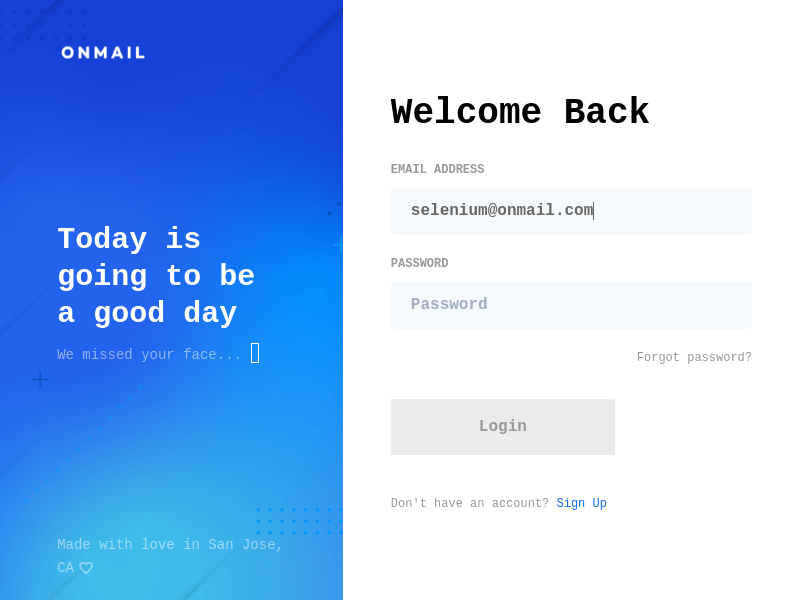

In [ ]:
browser

In [ ]:
browser.find_element('name', 'password').send_keys(password)

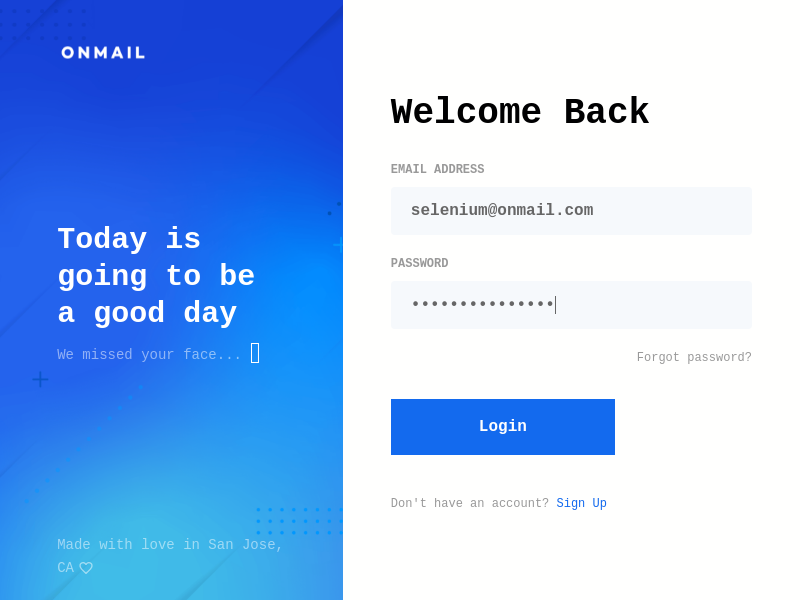

In [ ]:
browser

In [ ]:
browser.find_element('name', 'password').send_keys(Keys.ENTER)

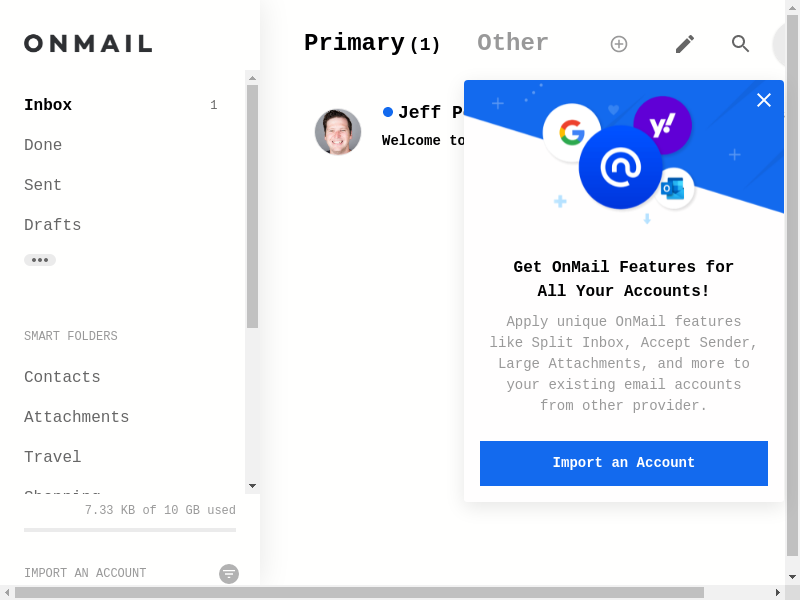

In [ ]:
browser

In [ ]:
from selenium.webdriver.common.action_chains import ActionChains

element = browser.find_element_by_xpath('//div[@class="p-3 mx-1 cursor-pointer hover:text-primary"]')
ActionChains(browser).move_to_element(element).click().perform()
ActionChains(browser).move_to_element(element).click().perform()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  This is separate from the ipykernel package so we can avoid doing imports until


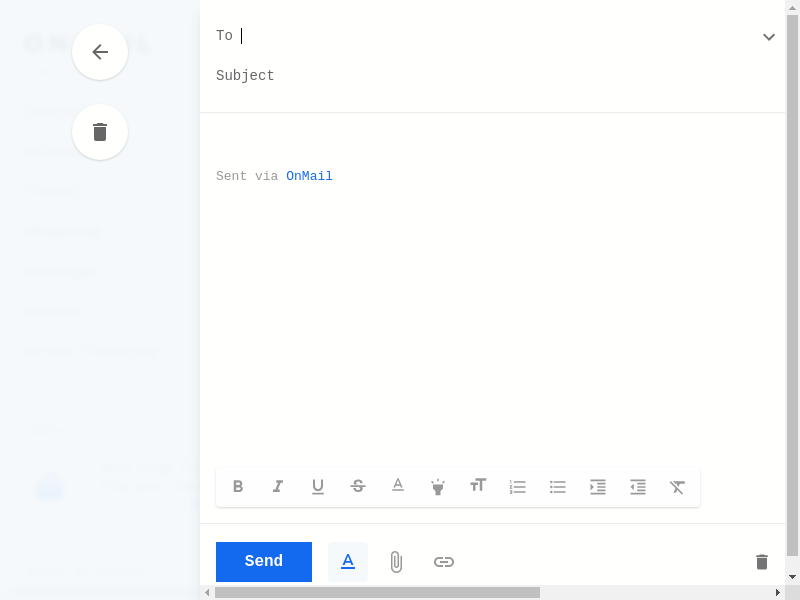

In [ ]:
browser

In [ ]:
browser.find_element('id', 'to').send_keys('selenium@onmail.com')


In [ ]:
browser.find_element('id', 'to').send_keys(Keys.TAB)
browser.find_element('id', 'to').send_keys(Keys.TAB)

In [ ]:
actions = ActionChains(browser)
actions.send_keys(Keys.TAB)
actions.send_keys(Keys.TAB)
actions.send_keys('My subject')
actions.send_keys(Keys.TAB)
actions.perform()

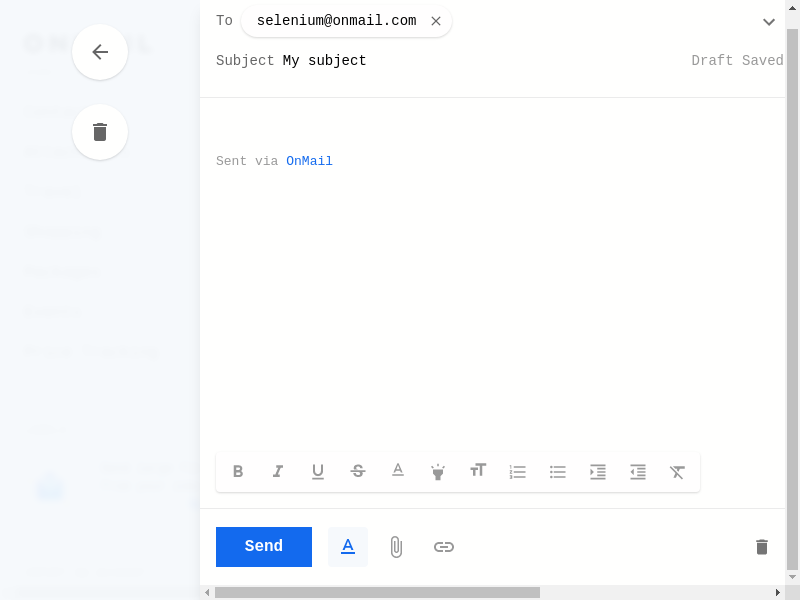

In [ ]:
browser

In [ ]:
actions.send_keys('Hello World')
actions.perform()

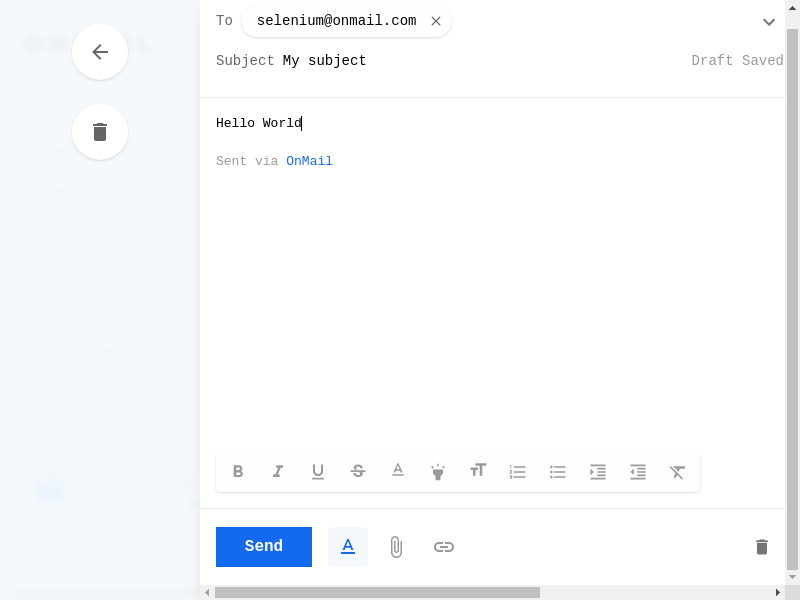

In [ ]:
browser

In [ ]:
actions.send_keys(Keys.TAB)
actions.send_keys(Keys.ENTER)
actions.perform()

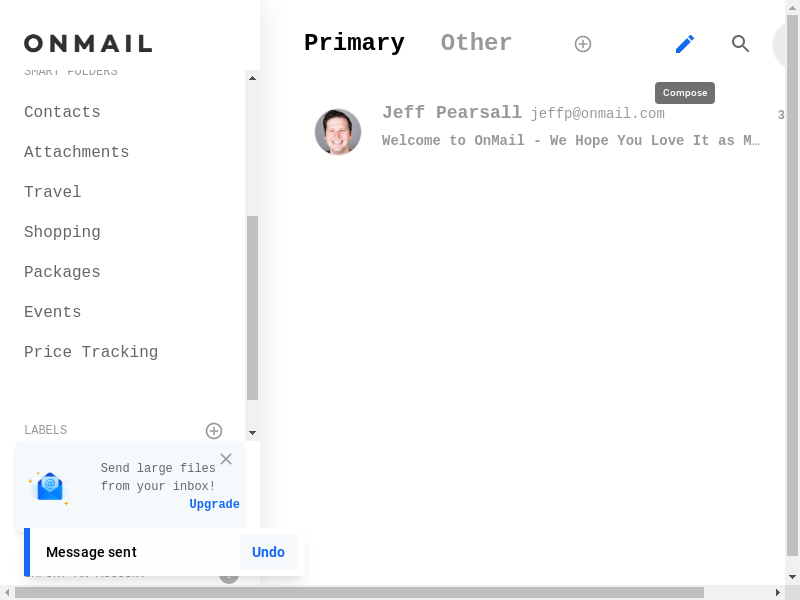

In [ ]:
browser

In [ ]:
browser.refresh()

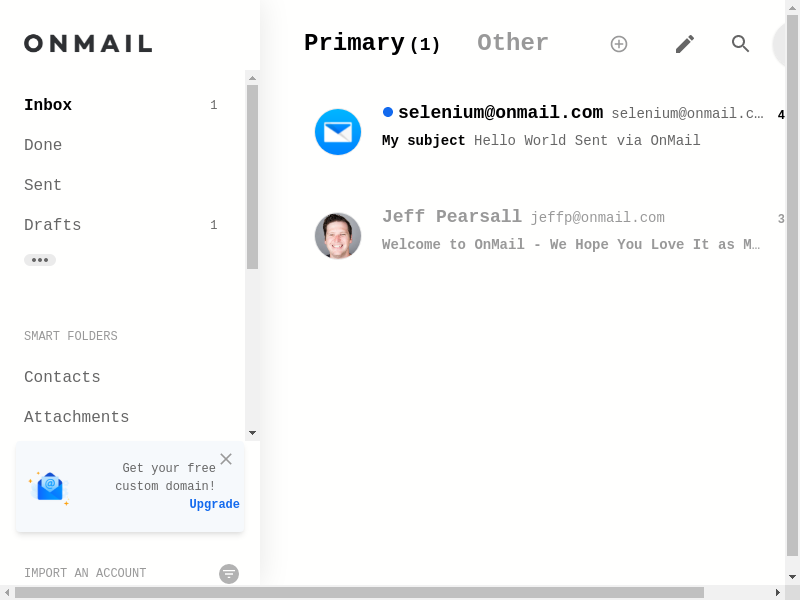

In [ ]:
browser

## Image Site Downloader

In [ ]:
from pathlib import Path
from urllib.parse import quote

from bs4 import BeautifulSoup
import requests


def download_images_from_site(website, query, n):
  """Search the website using the query and download the first n images."""
  search_url = 'https://' + website + '/search?q=' + quote(query)
  search_page = BeautifulSoup(requests.get(search_url).text)

  save_directory = Path(f"{query.replace(' ', '_')}({website})")
  save_directory.mkdir()

  download_count = 0

  for img in search_page.find_all('img'):
    if website in img['src']:
      download_count += 1
      try:
        download_image(img['src'], save_directory)
      except:
        print(f'Failed to download {img["src"]}')
    if download_count == n:
      break
  print(f'Downloaded {download_count} images to "{save_directory}".')


def download_image(url, save_directory):
  """Download image from url and save it to the save directory."""
  img_name = url.split('/')[-1]
  content = requests.get('https:' + url).content
  with open(save_directory / img_name, 'wb') as image_file:
    image_file.write(content)



In [ ]:
download_images_from_site('imgur.com', 'the moon', 5)

Downloaded 5 images to "the_moon(imgur.com)".


In [ ]:
download_images_from_site('imgur.com', 'moons of jupiter', 10)

Downloaded 10 images to "moons_of_jupiter(imgur.com)".


In [ ]:
!ls 'moons_of_jupiter(imgur.com)' -lh

total 56K
-rw-r--r-- 1 root root 3.6K Oct 14 14:26 341KXspb.jpg
-rw-r--r-- 1 root root 1.7K Oct 14 14:26 65agsyPb.jpg
-rw-r--r-- 1 root root 1.8K Oct 14 14:26 7Uwb3PBb.jpg
-rw-r--r-- 1 root root 4.2K Oct 14 14:26 DVYqvcbb.jpg
-rw-r--r-- 1 root root 2.7K Oct 14 14:26 ea2WX7Rb.jpg
-rw-r--r-- 1 root root 4.2K Oct 14 14:26 KbemZxdb.jpg
-rw-r--r-- 1 root root 4.6K Oct 14 14:26 lhzMWkbb.jpg
-rw-r--r-- 1 root root  747 Oct 14 14:26 tliD2Qqb.jpg
-rw-r--r-- 1 root root 7.2K Oct 14 14:26 xYnjBg7b.jpg
-rw-r--r-- 1 root root  864 Oct 14 14:26 YVkOuSZb.jpg


## 2048

In [ ]:
!apt update &> /dev/null
!apt install chromium-chromedriver &> /dev/null
!pip install selenium &> /dev/null

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

def _screen_shot(self):
    from tempfile import NamedTemporaryFile as TempFile
    tmp = TempFile(suffix='.png')
    self.save_screenshot(tmp.name)
    return tmp.read()

webdriver.Chrome._repr_png_ = _screen_shot

In [ ]:
import time

def play_2048(browser):
  """Opens 2048 in the browser and sends the keys up, right, down, left until
  the game ends. Then prints the score."""
  browser.get('https://play2048.co/')
  window = browser.find_element(By.TAG_NAME, 'html')
  while is_game_active(browser):
      window.send_keys(Keys.UP)
      window.send_keys(Keys.RIGHT)
      window.send_keys(Keys.DOWN)
      window.send_keys(Keys.LEFT)
      time.sleep(0.1)
  score = browser.find_element(By.CLASS_NAME, 'score-container').text
  print(f'Finished with a score of {score}')


def is_game_active(browser):
  """Returns True if game over is not on screen."""
  try:
    browser.find_element(By.CLASS_NAME, 'game-over')
    return False
  except NoSuchElementException:
    return True

In [ ]:
browser.quit()
browser = webdriver.Chrome('chromedriver', options=options)

In [ ]:
play_2048(browser)

Finished with a score of 2424
+4


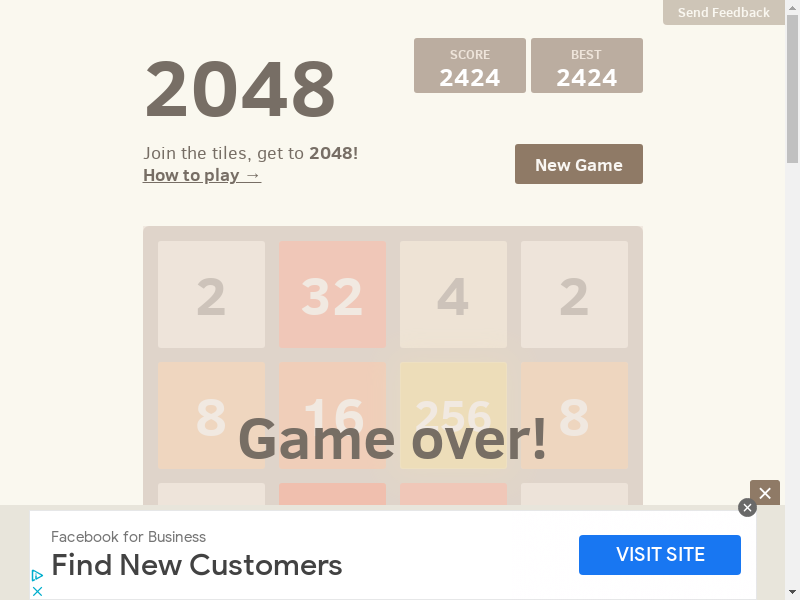

In [ ]:
browser

## Link Verification

In [ ]:
def verify_links(url):
  page = BeautifulSoup(requests.get(url).text)
  links = []
  for link in page.find_all('a'):
    if link['href'].startswith('https://'):
      links.append(link['href'])
    elif link['href'].startswith('//'):
      links.append('https:' + link['href'])
    elif link['href'].startswith('/'):
      links.append(url + link['href'])
  broken_link_count = 0
  for link in links:
    status = requests.get(link).status_code
    if status == 404:
      print(f'**[404] {link}')
      broken_link_count += 1
    else:
      print(f'[{status}] {link}')
    
  print(f'Found {broken_link_count} broken links.')


In [ ]:
verify_links('https://python.org')

[200] https://python.org/
[200] https://python.org/psf-landing/
[200] https://docs.python.org
[200] https://pypi.org/
[200] https://python.org/jobs/
[200] https://python.org/community-landing/
[200] https://python.org/
[200] https://psfmember.org/civicrm/contribute/transact?reset=1&id=2
[200] https://www.facebook.com/pythonlang?fref=ts
[200] https://twitter.com/ThePSF
[200] https://python.org/community/irc/
[200] https://python.org/about/
[200] https://python.org/about/apps/
[200] https://python.org/about/quotes/
[200] https://python.org/about/gettingstarted/
[200] https://python.org/about/help/
[200] https://python.org/downloads/
[200] https://python.org/downloads/
[200] https://python.org/downloads/source/
[200] https://python.org/downloads/windows/
[200] https://python.org/downloads/macos/
[200] https://python.org/download/other/
[200] https://docs.python.org/3/license.html
[200] https://python.org/download/alternatives
[200] https://python.org/doc/
[200] https://python.org/doc/
[20